In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=079f43442134212973786a277a29ecad


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kollam
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | luanda
Processing Record 4 of Set 13 | hithadhoo
Processing Record 5 of Set 13 | punta arenas
Processing Record 6 of Set 13 | sukhobezvodnoye
Processing Record 7 of Set 13 | namibe
Processing Record 8 of Set 13 | qaanaaq
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | khatanga
Processing Record 11 of Set 13 | lagoa
Processing Record 12 of Set 13 | barrow
Processing Record 13 of Set 13 | college
Processing Record 14 of Set 13 | mar del plata
Processing Record 15 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 13 | arman
Processing Record 17 of Set 13 | butaritari
Processing Record 18 of Set 13 | ushuaia
Processing Record 19 of Set 13 | aykhal
Processing Record 20 of Set 13 | amaraji
Processing Record 21 of Set 13 | kathmandu
Processing Record 22 of Set 13 | m

Processing Record 34 of Set 16 | poum
Processing Record 35 of Set 16 | mujiayingzi
Processing Record 36 of Set 16 | cayenne
Processing Record 37 of Set 16 | belmonte
Processing Record 38 of Set 16 | saleaula
City not found. Skipping...
Processing Record 39 of Set 16 | maraa
Processing Record 40 of Set 16 | tuy hoa
Processing Record 41 of Set 16 | kruisfontein
Processing Record 42 of Set 16 | bambous virieux
Processing Record 43 of Set 16 | xiongyue
Processing Record 44 of Set 16 | shingu
Processing Record 45 of Set 16 | kumluca
Processing Record 46 of Set 16 | tomsk
Processing Record 47 of Set 16 | torbay
Processing Record 48 of Set 16 | dois corregos
Processing Record 49 of Set 16 | rio grande
Processing Record 50 of Set 16 | luderitz
Processing Record 1 of Set 17 | rayadrug
Processing Record 2 of Set 17 | vila praia de ancora
Processing Record 3 of Set 17 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 17 | salym
Processing Record 5 of Set 17 | stornoway
Process

Processing Record 20 of Set 20 | kaitangata
Processing Record 21 of Set 20 | morros
Processing Record 22 of Set 20 | bac lieu
Processing Record 23 of Set 20 | mahibadhoo
Processing Record 24 of Set 20 | svetlogorsk
Processing Record 25 of Set 20 | grand gaube
Processing Record 26 of Set 20 | pevek
Processing Record 27 of Set 20 | surman
Processing Record 28 of Set 20 | lata
Processing Record 29 of Set 20 | margate
Processing Record 30 of Set 20 | tungkang
City not found. Skipping...
Processing Record 31 of Set 20 | leningradskiy
Processing Record 32 of Set 20 | mbini
Processing Record 33 of Set 20 | yhu
Processing Record 34 of Set 20 | petropavlovskoye
Processing Record 35 of Set 20 | nampula
Processing Record 36 of Set 20 | cockburn town
Processing Record 37 of Set 20 | launceston
Processing Record 38 of Set 20 | lufilufi
Processing Record 39 of Set 20 | inhuma
Processing Record 40 of Set 20 | teguise
Processing Record 41 of Set 20 | severo-kurilsk
Processing Record 42 of Set 20 | den

Processing Record 9 of Set 24 | ko samui
Processing Record 10 of Set 24 | bouillante
Processing Record 11 of Set 24 | port augusta
Processing Record 12 of Set 24 | sao jose da coroa grande
Processing Record 13 of Set 24 | bonavista
Processing Record 14 of Set 24 | newcastle
Processing Record 15 of Set 24 | watertown
Processing Record 16 of Set 24 | douglas
Processing Record 17 of Set 24 | tautira
Processing Record 18 of Set 24 | inirida
Processing Record 19 of Set 24 | porto seguro
Processing Record 20 of Set 24 | jalu
Processing Record 21 of Set 24 | san andres
Processing Record 22 of Set 24 | sorland
Processing Record 23 of Set 24 | inderborskiy
City not found. Skipping...
Processing Record 24 of Set 24 | laguna de perlas
Processing Record 25 of Set 24 | rio gallegos
Processing Record 26 of Set 24 | barwadih
Processing Record 27 of Set 24 | bargal
City not found. Skipping...
Processing Record 28 of Set 24 | kailua
Processing Record 29 of Set 24 | lasa
Processing Record 30 of Set 24 |

In [7]:
len(city_data)

577

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kollam,8.8833,76.6000,84.20,70,20,2.15,IN,2021-02-06 16:25:13
1,Mataura,-46.1927,168.8643,49.21,94,3,1.16,NZ,2021-02-06 16:25:13
2,Luanda,-8.8368,13.2343,84.20,70,20,10.36,AO,2021-02-06 16:25:14
3,Hithadhoo,-0.6000,73.0833,81.99,76,100,14.25,MV,2021-02-06 16:25:14
4,Punta Arenas,-53.1500,-70.9167,57.20,41,20,19.57,CL,2021-02-06 16:20:58
5,Sukhobezvodnoye,57.0491,44.8891,-4.38,91,100,10.51,RU,2021-02-06 16:25:14
6,Namibe,-15.1961,12.1522,75.43,70,25,12.15,AO,2021-02-06 16:25:14
7,Qaanaaq,77.4840,-69.3632,9.66,87,100,7.31,GL,2021-02-06 16:23:30
8,Busselton,-33.6500,115.3333,59.00,94,100,1.01,AU,2021-02-06 16:25:14
9,Khatanga,71.9667,102.5000,-36.92,78,0,5.12,RU,2021-02-06 16:25:02


In [9]:
#Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kollam,IN,2021-02-06 16:25:13,8.8833,76.6000,84.20,70,20,2.15
1,Mataura,NZ,2021-02-06 16:25:13,-46.1927,168.8643,49.21,94,3,1.16
2,Luanda,AO,2021-02-06 16:25:14,-8.8368,13.2343,84.20,70,20,10.36
3,Hithadhoo,MV,2021-02-06 16:25:14,-0.6000,73.0833,81.99,76,100,14.25
4,Punta Arenas,CL,2021-02-06 16:20:58,-53.1500,-70.9167,57.20,41,20,19.57
...,...,...,...,...,...,...,...,...,...
572,Port Hedland,AU,2021-02-06 16:26:57,-20.3167,118.5667,80.60,74,90,6.91
573,Keti Bandar,PK,2021-02-06 16:26:57,24.1447,67.4497,68.05,57,0,9.75
574,Conceicao Do Araguaia,BR,2021-02-06 16:26:57,-8.2578,-49.2647,80.76,85,90,5.84
575,Gamba,GA,2021-02-06 16:26:57,-2.6500,10.0000,82.26,82,82,8.46


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

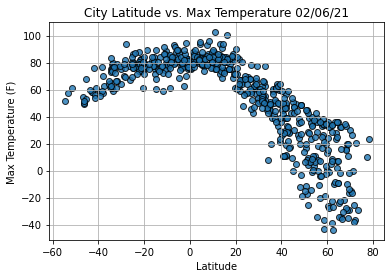

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

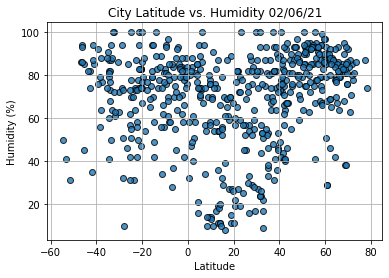

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

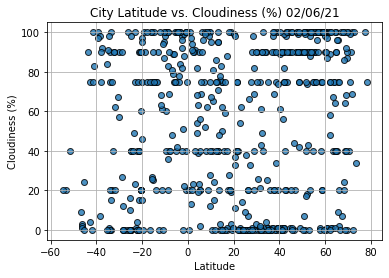

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

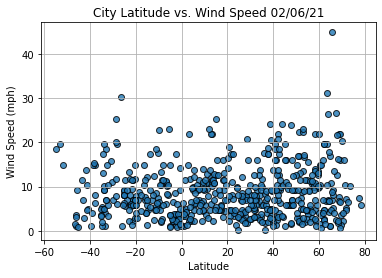

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title , wrap=True)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2021-02-06 16:25:16
Lat                      -38.0023
Lng                      -57.5575
Max Temp                  69.8000
Humidity                       64
Cloudiness                     75
Wind Speed                14.9700
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
572    False
573     True
574    False
575    False
576     True
Name: Lat, Length: 577, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kollam,IN,2021-02-06 16:25:13,8.8833,76.6000,84.20,70,20,2.15
5,Sukhobezvodnoye,RU,2021-02-06 16:25:14,57.0491,44.8891,-4.38,91,100,10.51
7,Qaanaaq,GL,2021-02-06 16:23:30,77.4840,-69.3632,9.66,87,100,7.31
9,Khatanga,RU,2021-02-06 16:25:02,71.9667,102.5000,-36.92,78,0,5.12
10,Lagoa,PT,2021-02-06 16:25:15,39.0500,-27.9833,59.58,90,100,20.45


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

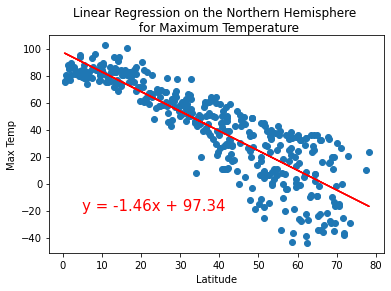

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-20))

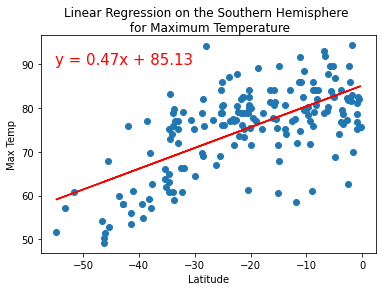

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

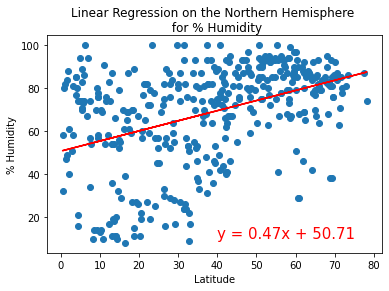

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

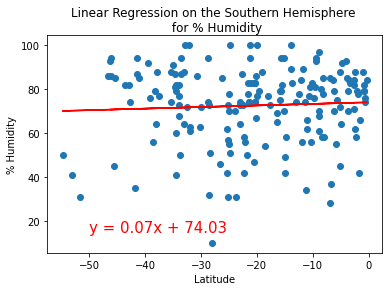

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

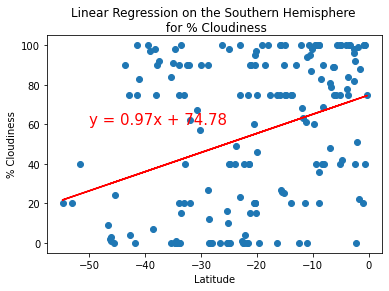

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

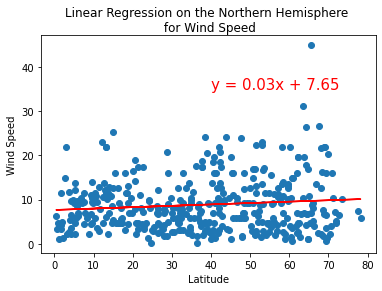

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

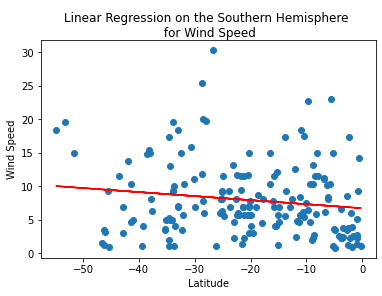

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))